In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
from SpectralMechanicsAnalysis.simulations import simulate_trajectory
from SpectralMechanicsAnalysis.models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
#from analyze_data import Laplace_NLL
import matplotlib.pyplot as plt
import numpy as np
from SpectralMechanicsAnalysis.data_handeling import Data

In [1]:
pip install -e ..


Obtaining file:///C:/Users/jschulz/Desktop/Spectral-Noise-Cleaning
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for SpectralMechanicsAnalysis (pyproject.toml): started
  Building editable for SpectralMechanicsAnalysis (pyproject.toml): finished with status 'done'
  Created wheel for SpectralMechanicsAnalysis: filename=SpectralMechanicsAnalysis-0.1.0-0.editable-py3-none-any.whl size=3997 sha256=f35235596601024797c515464f

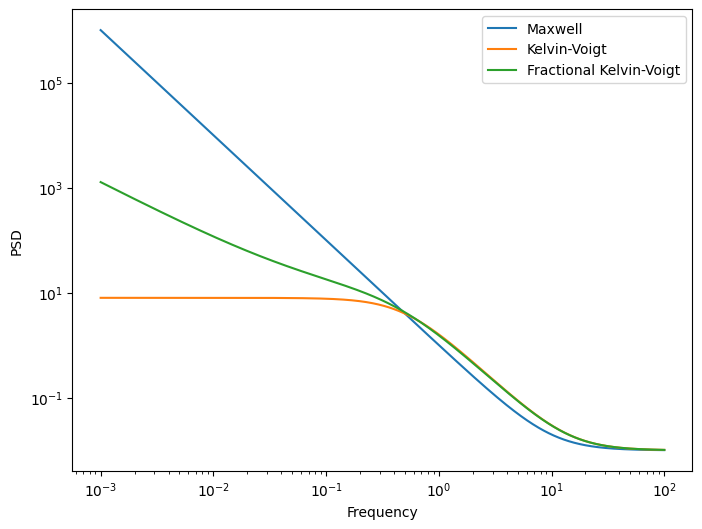

In [2]:
#plot the PSD of the idfferent models
fig, ax = plt.subplots(1,1, figsize=(8,6))
min_freq = 0.001
max_freq = 100
freq = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
A = .5
B = 1.
alpha = .1
beta = 1
noise = 0.01
PSD_maxwell = PSD(freq, G_Maxwell, [A, B,noise])
plt.plot(freq, PSD_maxwell, label='Maxwell')
PSD_kv = PSD(freq, G_Kelvin_Voigt, [A, B,noise])
plt.plot(freq, PSD_kv, label='Kelvin-Voigt')
PSD_fkv = PSD(freq, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise])
plt.plot(freq, PSD_fkv, label='Fractional Kelvin-Voigt')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

In [3]:
simulation_time =int( 1/min_freq)
sampling_steps = int(simulation_time*max_freq*2)

log_weighted = True
unweighted_postfit = True

maxwell_data = Data(*simulate_trajectory(simulation_time,sampling_steps, G_Maxwell, [A, B, noise]), name='Maxwell', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
kelvin_voit_data= Data(*simulate_trajectory(simulation_time,sampling_steps, G_Kelvin_Voigt, [A, B, noise]), name='Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
fractional_kelvin_voigt_data=Data(*simulate_trajectory(simulation_time,sampling_steps, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise]), name='Fractional Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)

Data_list = [maxwell_data, kelvin_voit_data, fractional_kelvin_voigt_data]

c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: divide by zero encountered in divide
  psd = np.where(omega == 0, 0, -2 * kbT / omega * np.imag(1/G(omega, *G_args)) + noise)
C:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\SpectralMechanicsAnalysis\models.py:9: RuntimeWarning: divide by zero encountered in divide
  return 1/(A /((1j * omega)) + B)
C:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\SpectralMechanicsAnalysis\models.py:9: RuntimeWarning: invalid value encountered in divide
  return 1/(A /((1j * omega)) + B)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: invalid value encountered in divide
  psd = np.where(omega == 0, 0, -2 * kbT / omega * np.imag(1/G(omega, *G_args)) + noise)
c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\models.py:15: RuntimeWarning: invalid value encountered in multiply
  psd = np.where(o

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


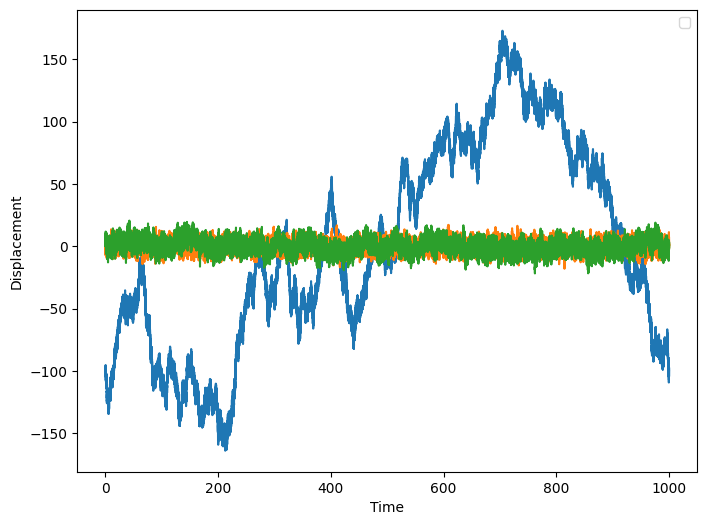

In [4]:
#plot the trajectory    
fig, ax = plt.subplots(1,1, figsize=(8,6))
for data in Data_list:
    data.plot_x(ax)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

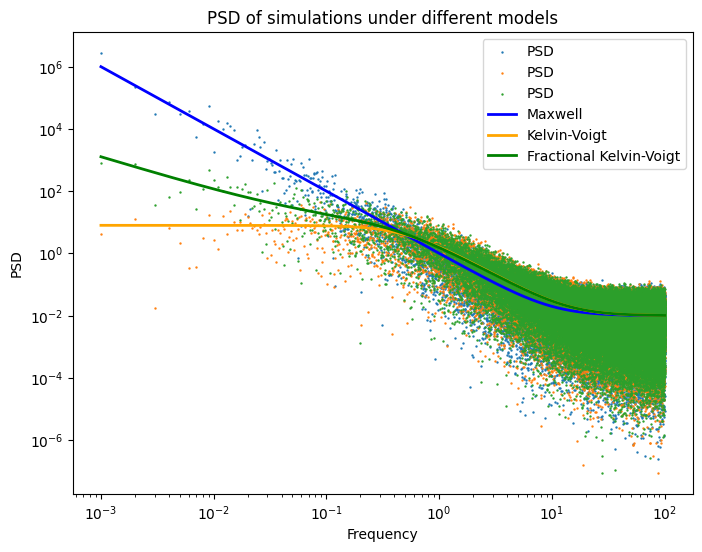

In [5]:
for data in Data_list:
    data.create_PSD()
#plot the PSD of the idfferent models
point_size = .5
fig, ax = plt.subplots(1,1, figsize=(8,6))
for data in Data_list:
    data.plot_psd(ax)
plt.plot(freq, PSD_maxwell, color = "blue",linewidth = 2, label='Maxwell')
plt.plot(freq, PSD_kv, color = "orange",linewidth = 2, label='Kelvin-Voigt')
plt.plot(freq, PSD_fkv, color = "green",linewidth = 2, label='Fractional Kelvin-Voigt')
plt.title('PSD of simulations under different models')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()


In [6]:
#make all the fits for all the data
for data in Data_list:
    data.create_NLL_maxwell()
    data.create_NLL_kelvin_voigt()
    data.create_NLL_fractional_kelvin_voigt()

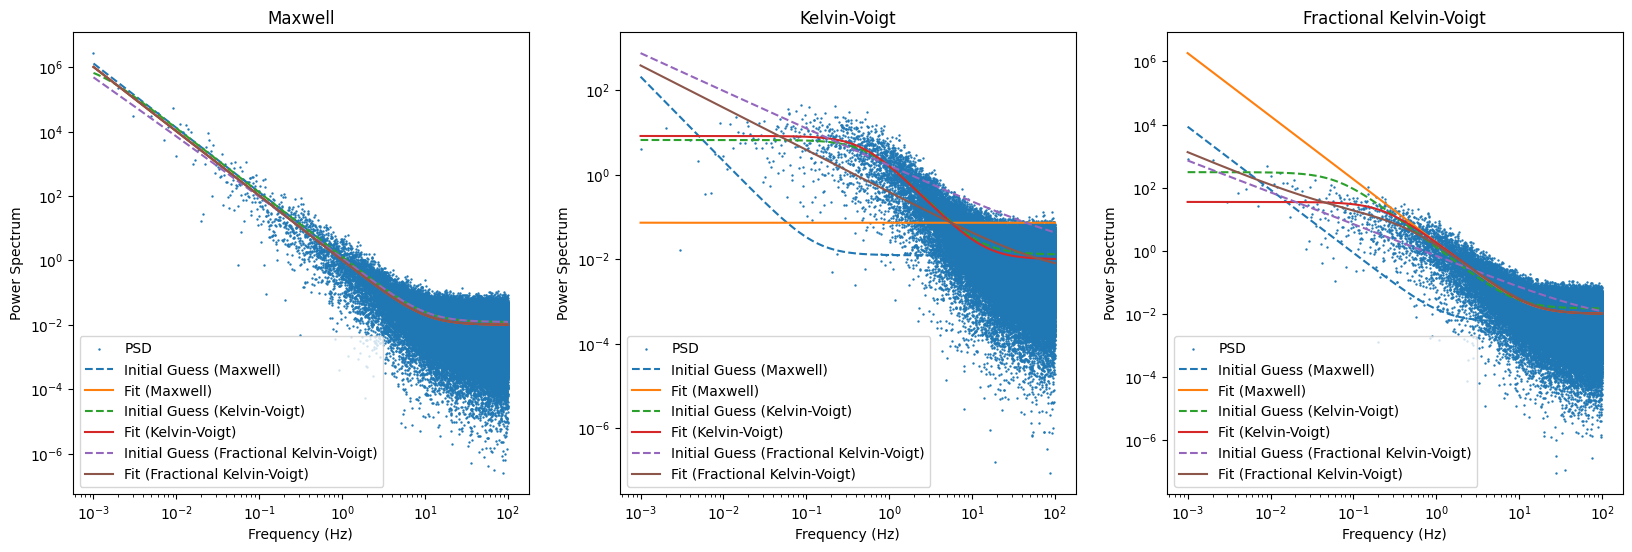

In [7]:
#make one plot for each data in a row. In each plot, plot the data and the fits

fig, ax = plt.subplots(1,3, figsize=(20,6))
data_names = ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt']
for i, data in enumerate(Data_list):
    #make title
    ax[i].set_title(data_names[i])
    data.plot_psd(ax[i])
    

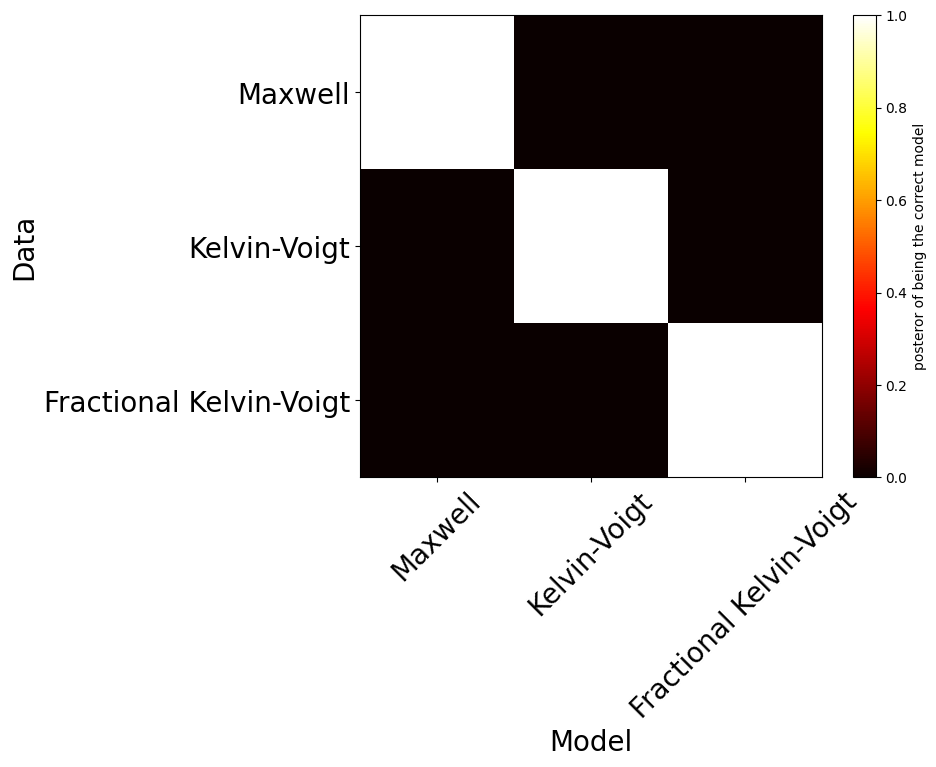

In [8]:
#make a matrix colormap with data on the one axis and models on the other axis. In each cell, plot the NLL of the model for the data
posteror_matrix = np.zeros((len(Data_list),3))
for i, data in enumerate(Data_list):
    data.bayesian_update()
    posteror_matrix[i,0] = data.posterior_maxwell
    posteror_matrix[i,1] = data.posterior_kelvin_voigt
    posteror_matrix[i,2] = data.posterior_fractional_kelvin_voigt

fig, ax = plt.subplots(1,1, figsize=(8,6))
im = ax.imshow(posteror_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im, ax=ax, label='posteror of being the correct model')
plt.xlabel('Model', fontsize=20)
plt.ylabel('Data', fontsize=20)
plt.xticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'], fontsize=20, rotation=45)
plt.yticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'], fontsize=20)
plt.show()


In [9]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9968476457714156
Kelvin-Voigt: 0.0031523227053573645
Fractional Kelvin-Voigt: 3.152322698812466e-08
Maxwell: [0.50861483 0.99969821 0.01001361]
Kelvin-Voigt: [6.76725966e-09 1.96608098e+00 1.00136719e-02]
Fractional Kelvin-Voigt: [1.718449790691176, 0.24763137818703487, 0.9999999998627518, 0.9999999999912763, 0.010013670415007208]

Kelvin-Voigt
Maxwell: 0.0
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [1.35972354e-10 1.00426355e+00 7.36600494e-02]
Kelvin-Voigt: [0.49207174 1.0069557  0.01005522]
Fractional Kelvin-Voigt: [6.043126719321707e-08, 5.778869635114202e-30, 7.491122113655349e-09, 8.888241416458377e-19, 0.004264223825616721]

Fractional Kelvin-Voigt
Maxwell: 1.062306656423618e-205
Kelvin-Voigt: 1.0378033974256199e-55
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.91632389 1.00129979 0.01011319]
Kelvin-Voigt: [0.24379461 1.0492429  0.01006253]
Fractional Kelvin-Voigt: [1.0052666182815506, 0.48660875154159566, 0.9877060505470285, 0.10091289601216591, 0.009

In [10]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9968476457714156
Kelvin-Voigt: 0.0031523227053573645
Fractional Kelvin-Voigt: 3.152322698812466e-08
Maxwell: [0.50861483 0.99969821 0.01001361]
Kelvin-Voigt: [6.76725966e-09 1.96608098e+00 1.00136719e-02]
Fractional Kelvin-Voigt: [1.718449790691176, 0.24763137818703487, 0.9999999998627518, 0.9999999999912763, 0.010013670415007208]

Kelvin-Voigt
Maxwell: 0.0
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [1.35972354e-10 1.00426355e+00 7.36600494e-02]
Kelvin-Voigt: [0.49207174 1.0069557  0.01005522]
Fractional Kelvin-Voigt: [6.043126719321707e-08, 5.778869635114202e-30, 7.491122113655349e-09, 8.888241416458377e-19, 0.004264223825616721]

Fractional Kelvin-Voigt
Maxwell: 1.062306656423618e-205
Kelvin-Voigt: 1.0378033974256199e-55
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.91632389 1.00129979 0.01011319]
Kelvin-Voigt: [0.24379461 1.0492429  0.01006253]
Fractional Kelvin-Voigt: [1.0052666182815506, 0.48660875154159566, 0.9877060505470285, 0.10091289601216591, 0.009

In [13]:
print(f"Maxwell parameter: A = {A}, B = {B}, noise = {noise}")
print(f"fitted Maxwell parameter: A = {maxwell_data.fit_maxwell[0]}, B = {maxwell_data.fit_maxwell[1]}, noise = {maxwell_data.fit_maxwell[2]}")
print(f"Kelvin-Voigt parameter: A = {A}, B = {B}, noise = {noise}")
print(f"fitted Kelvin-Voigt parameter: A = {kelvin_voit_data.fit_kelvin_voigt[0]}, B = {kelvin_voit_data.fit_kelvin_voigt[1]}, noise = {kelvin_voit_data.fit_kelvin_voigt[2]}")
print(f"Fractional Kelvin-Voigt parameter: A = {A}, B = {B}, alpha = {alpha}, beta = {beta}, noise = {noise}")
print(f"fitted Fractional Kelvin-Voigt parameter: A = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[0]}, B = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[1]}, alpha = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[2]}, beta = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[3]}, noise = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[4]}")

Maxwell parameter: A = 0.5, B = 1.0, noise = 0.01
fitted Maxwell parameter: A = 0.5086148279526526, B = 0.999698211239997, noise = 0.010013610362030625
Kelvin-Voigt parameter: A = 0.5, B = 1.0, noise = 0.01
fitted Kelvin-Voigt parameter: A = 0.49207174011605825, B = 1.0069557027039133, noise = 0.010055224453070583
Fractional Kelvin-Voigt parameter: A = 0.5, B = 1.0, alpha = 0.1, beta = 1, noise = 0.01
fitted Fractional Kelvin-Voigt parameter: A = 1.0052666182815506, B = 0.48660875154159566, alpha = 0.9877060505470285, beta = 0.10091289601216591, noise = 0.00996619102951316
